# Exercise with Natural Language Processing

For todays exersice we will be doing two things.  The first is to build the same model with the same data that we did in the lecture, the second will be to build a new model with new data. 

## PART 1: 
- 20 Newsgroups Corpus
0. Inspect data
0. Clean and Process Text
0. Vectorize your text
0. Classify your text using Multinomial Naive Bayes
0. Classify your text using Random Forest. 
0. Eval your models.  
0. Classify a NEW PIECE of text. Any string you want to feed it. 


## PART 2:
- Republican vs Democrat Tweet Classifier
0.  This is self guided, can you get a f1 above 82%?  -its not easy.

```
Need to install nltk pip
```

In [74]:
# Import pandas for data handling
import pandas as pd

# NLTK is our Natural-Language-Took-Kit
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Libraries for helping us with strings
import string
# Regular Expression Library
import re

# Import our text vectorizers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


# Import our classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier


# Import some ML helper function
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

# Import our metrics to evaluate our model
from sklearn import metrics


# Library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# You may need to download these from nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('words')
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\winge\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\winge\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\winge\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\winge\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


## Load and display data.
1. Load the 20-newsgroups.csv data into a dataframe.
1. Print the shape
1. Inspect / remove nulls and duplicates
1. Find class balances, print out how many of each topic_category there are.

In [2]:
# 1. Load the 20-newsgroups.csv data into a dataframe.
# 2. Print the shape
df_newsgroups = pd.read_csv('data/20-newsgroups.csv')
print(df_newsgroups.shape)
df_newsgroups.head()


(11314, 4)


,id,message,topic,topic_category
0,0,From: lerxst@wam.umd.edu (where's my thing)\r\...,7,rec.autos
1,1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware
2,2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware
3,3,From: jgreen@amber (Joe Green)\r\nSubject: Re:...,1,comp.graphics
4,4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space


In [3]:
# 3. Inspect / remove nulls and duplicates
def inspect_dataframe(input_df):
   
    print('The Null Values:\n',input_df.isnull().sum())
    print('\n')
    print('The Duplicate Values:\n',input_df.duplicated().sum())
    print('\n')
    print('The Description:\n',input_df.describe())
    print('\n')
    print('Columns:')
    for col in input_df.columns:
        print(col)
    
    pass

inspect_dataframe(df_newsgroups)

The Null Values:
 id                0
message           0
topic             0
topic_category    0
dtype: int64


The Duplicate Values:
 0


The Description:
                  id         topic
count  11314.000000  11314.000000
mean    5656.500000      9.293000
std     3266.214807      5.562719
min        0.000000      0.000000
25%     2828.250000      5.000000
50%     5656.500000      9.000000
75%     8484.750000     14.000000
max    11313.000000     19.000000


Columns:
id
message
topic
topic_category


In [4]:
# 4. Find class balances, print out how many of each topic_category there are.
df_newsgroups.topic_category.value_counts()

topic_category
rec.sport.hockey            600
soc.religion.christian      599
rec.motorcycles             598
rec.sport.baseball          597
sci.crypt                   595
rec.autos                   594
sci.med                     594
comp.windows.x              593
sci.space                   593
comp.os.ms-windows.misc     591
sci.electronics             591
comp.sys.ibm.pc.hardware    590
misc.forsale                585
comp.graphics               584
comp.sys.mac.hardware       578
talk.politics.mideast       564
talk.politics.guns          546
alt.atheism                 480
talk.politics.misc          465
talk.religion.misc          377
Name: count, dtype: int64

# Text Pre-Processing 
(aka Feature engineering)
1. Make a function that makes all text lowercase.
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
2. Make a function that removes all punctuation. 
    * Do a sanity check by feeding in a test sentence into the function. 
    
0. EXTRA CREDIT:  
    0. Make a function that stemms all words. 
    0. Make a function that removes all stopwords.

5. Mandatory: Make a pipeline function that applys all the text processing functions you just built.
    * Do a sanity check by feeding in a test sentence into the pipeline. 
    
6. Mandatory: Use `df['message_clean'] = df[column].apply(???)` and apply the text pipeline to your text data column. 

In [5]:
# 1. Make a function that makes all text lowercase.

# Lowercase all words
def make_lower(a_string):
    return a_string.lower()

a_sentence = 'This was A SENTENCE with lower and UPPER CASE.'
make_lower(a_sentence)

'this was a sentence with lower and upper case.'

In [6]:
# 2. Make a function that removes all punctuation. 

# Remove all punctuation

def remove_punctuation(a_string):    
    a_string = re.sub(r'[^\w\s]','',a_string)
    return a_string


a_sentence = 'This is a sentence! 50 With lots of punctuation??? & other #things.'
remove_punctuation(a_sentence)


'This is a sentence 50 With lots of punctuation  other things'

In [7]:
# 3. Make a function that removes all stopwords.

# Remove all stopwords

def remove_stopwords(a_string):
    # Break the sentence down into a list of words
    words = word_tokenize(a_string)
    
    # Make a list to append valid words into
    valid_words = []
    
    # Loop through all the words
    for word in words:
        
        # Check if word is not in stopwords
        if word not in stopwords:
            
            # If word not in stopwords, append to our valid_words
            valid_words.append(word)

    # Join the list of words together into a string
    a_string = ' '.join(valid_words)

    return a_string
            
test_string = 'This is a sentence! With some different stopwords i have added in here.'

remove_stopwords(a_sentence)



'This sentence ! 50 With lots punctuation ? ? ? & # things .'

In [8]:
# 4. EXTRA CREDIT: Make a function that stems all words. 

def stem_words(sentence):
    stemming_words = PorterStemmer()
    
    words = word_tokenize(sentence)
    
    for word in words:
        print (word, " : ", stemming_words.stem(word))    



test_string = 'I played and started playing with players and we all love to play with plays'

stem_words(test_string)

I  :  i
played  :  play
and  :  and
started  :  start
playing  :  play
with  :  with
players  :  player
and  :  and
we  :  we
all  :  all
love  :  love
to  :  to
play  :  play
with  :  with
plays  :  play


In [9]:
# 5. MANDATORY: Make a pipeline function that apply all the text processing functions you just built.

def text_pipeline(input_string):
    input_string = make_lower(input_string)
    input_string = remove_punctuation(input_string)
    # input_string = remove_stopwords(input_string)
    # input_string = stem_words(input_string)
    return input_string

test_string = 'I played and started playing with players and we all love to play with plays'

text_pipeline(test_string)

'i played and started playing with players and we all love to play with plays'

In [10]:
# 6. Mandatory: Use `df[column].apply(???)` and apply the text pipeline to your text data column. 

df_newsgroups['message_clean'] = df_newsgroups['message'].apply(text_pipeline)

print("ORIGINAL TEXT:\n", df_newsgroups['message'][0])
print('-'*999)
print("CLEANED TEXT:\n", df_newsgroups['message_clean'][0])


ORIGINAL TEXT:
 From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Text Vectorization

1. Define your `X` and `y` data. 


2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).
    * Do you want to use n-grams..?


3. Fit your vectorizer using your X data.
    * Remember, this process happens IN PLACE.


4. Transform your X data using your fitted vectorizer. 
    * `X = vectorizer.???`



5. Print the shape of your X.  How many features (aka columns) do you have?

In [11]:
# 0. Define your `X` and `y` data. 

X = df_newsgroups['message_clean']

y = df_newsgroups['topic_category']


In [14]:
# 1. Train test split your data.
# Split our data into testing and training like always. 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


# Save the raw text for later just incase
X_train_text = X_train
X_test_text = X_test

print(df_newsgroups.shape, len(X_train_text))

(11314, 5) 9051


In [15]:
# 2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).

# Initialize our vectorizer
vectorizer = TfidfVectorizer()

In [16]:
# 3. Fit your vectorizer using your X data

# This makes your vocab matrix
vectorizer.fit(X_train)


TfidfVectorizer()

In [17]:
# 4. Transform your X data using your fitted vectorizer. 

# This transforms your documents into vectors.
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)


In [18]:
# 5. Print the shape of your X.  How many features (aka columns) do you have?

print(X_train.shape, type(X_train))

(9051, 122023) <class 'scipy.sparse._csr.csr_matrix'>


___
# Build and Train Model
Use Multinomial Naive Bayes to classify these documents. 

1. Initalize an empty model. 
2. Fit the model with our training data.


Experiment with different alphas.  Use the alpha gives you the best result.

EXTRA CREDIT:  Use grid search to programmatically do this for you. 

In [20]:
# 1. Initialize an empty model. 
model_newsgroups = MultinomialNB()


In [21]:
# Fit our model with our training data.
model_newsgroups.fit(X_train, y_train)

MultinomialNB()

# Evaluate the model.

1. Make new predicitions using our test data. 
2. Print the accuracy of the model. 
3. Print the confusion matrix of our predictions. 
4. Using `classification_report` print the evaluation results for all the classes. 



In [22]:
# 1. Make new predictions of our testing data. 
y_pred = model_newsgroups.predict(X_test)

In [23]:
# 2. Print the accuracy of the model. 
accuracy =  model_newsgroups.score(X_test, y_test)

print("Model Accuracy: %f" % accuracy)

Model Accuracy: 0.840035


In [25]:
# 3. Plot the confusion matrix of our predictions
# you can use Sklearns `ConfusionMatrixDisplay`
print(classification_report(y_test, y_pred, target_names=model_newsgroups.classes_))

                          precision    recall  f1-score   support

             alt.atheism       0.89      0.60      0.72        96
           comp.graphics       0.89      0.79      0.84       117
 comp.os.ms-windows.misc       0.87      0.84      0.85       118
comp.sys.ibm.pc.hardware       0.72      0.79      0.75       118
   comp.sys.mac.hardware       0.92      0.90      0.91       115
          comp.windows.x       0.91      0.86      0.88       119
            misc.forsale       0.86      0.57      0.69       117
               rec.autos       0.85      0.93      0.89       119
         rec.motorcycles       0.98      0.93      0.96       120
      rec.sport.baseball       0.97      0.94      0.96       119
        rec.sport.hockey       0.92      1.00      0.96       120
               sci.crypt       0.69      0.99      0.81       119
         sci.electronics       0.92      0.79      0.85       118
                 sci.med       1.00      0.89      0.94       119
         

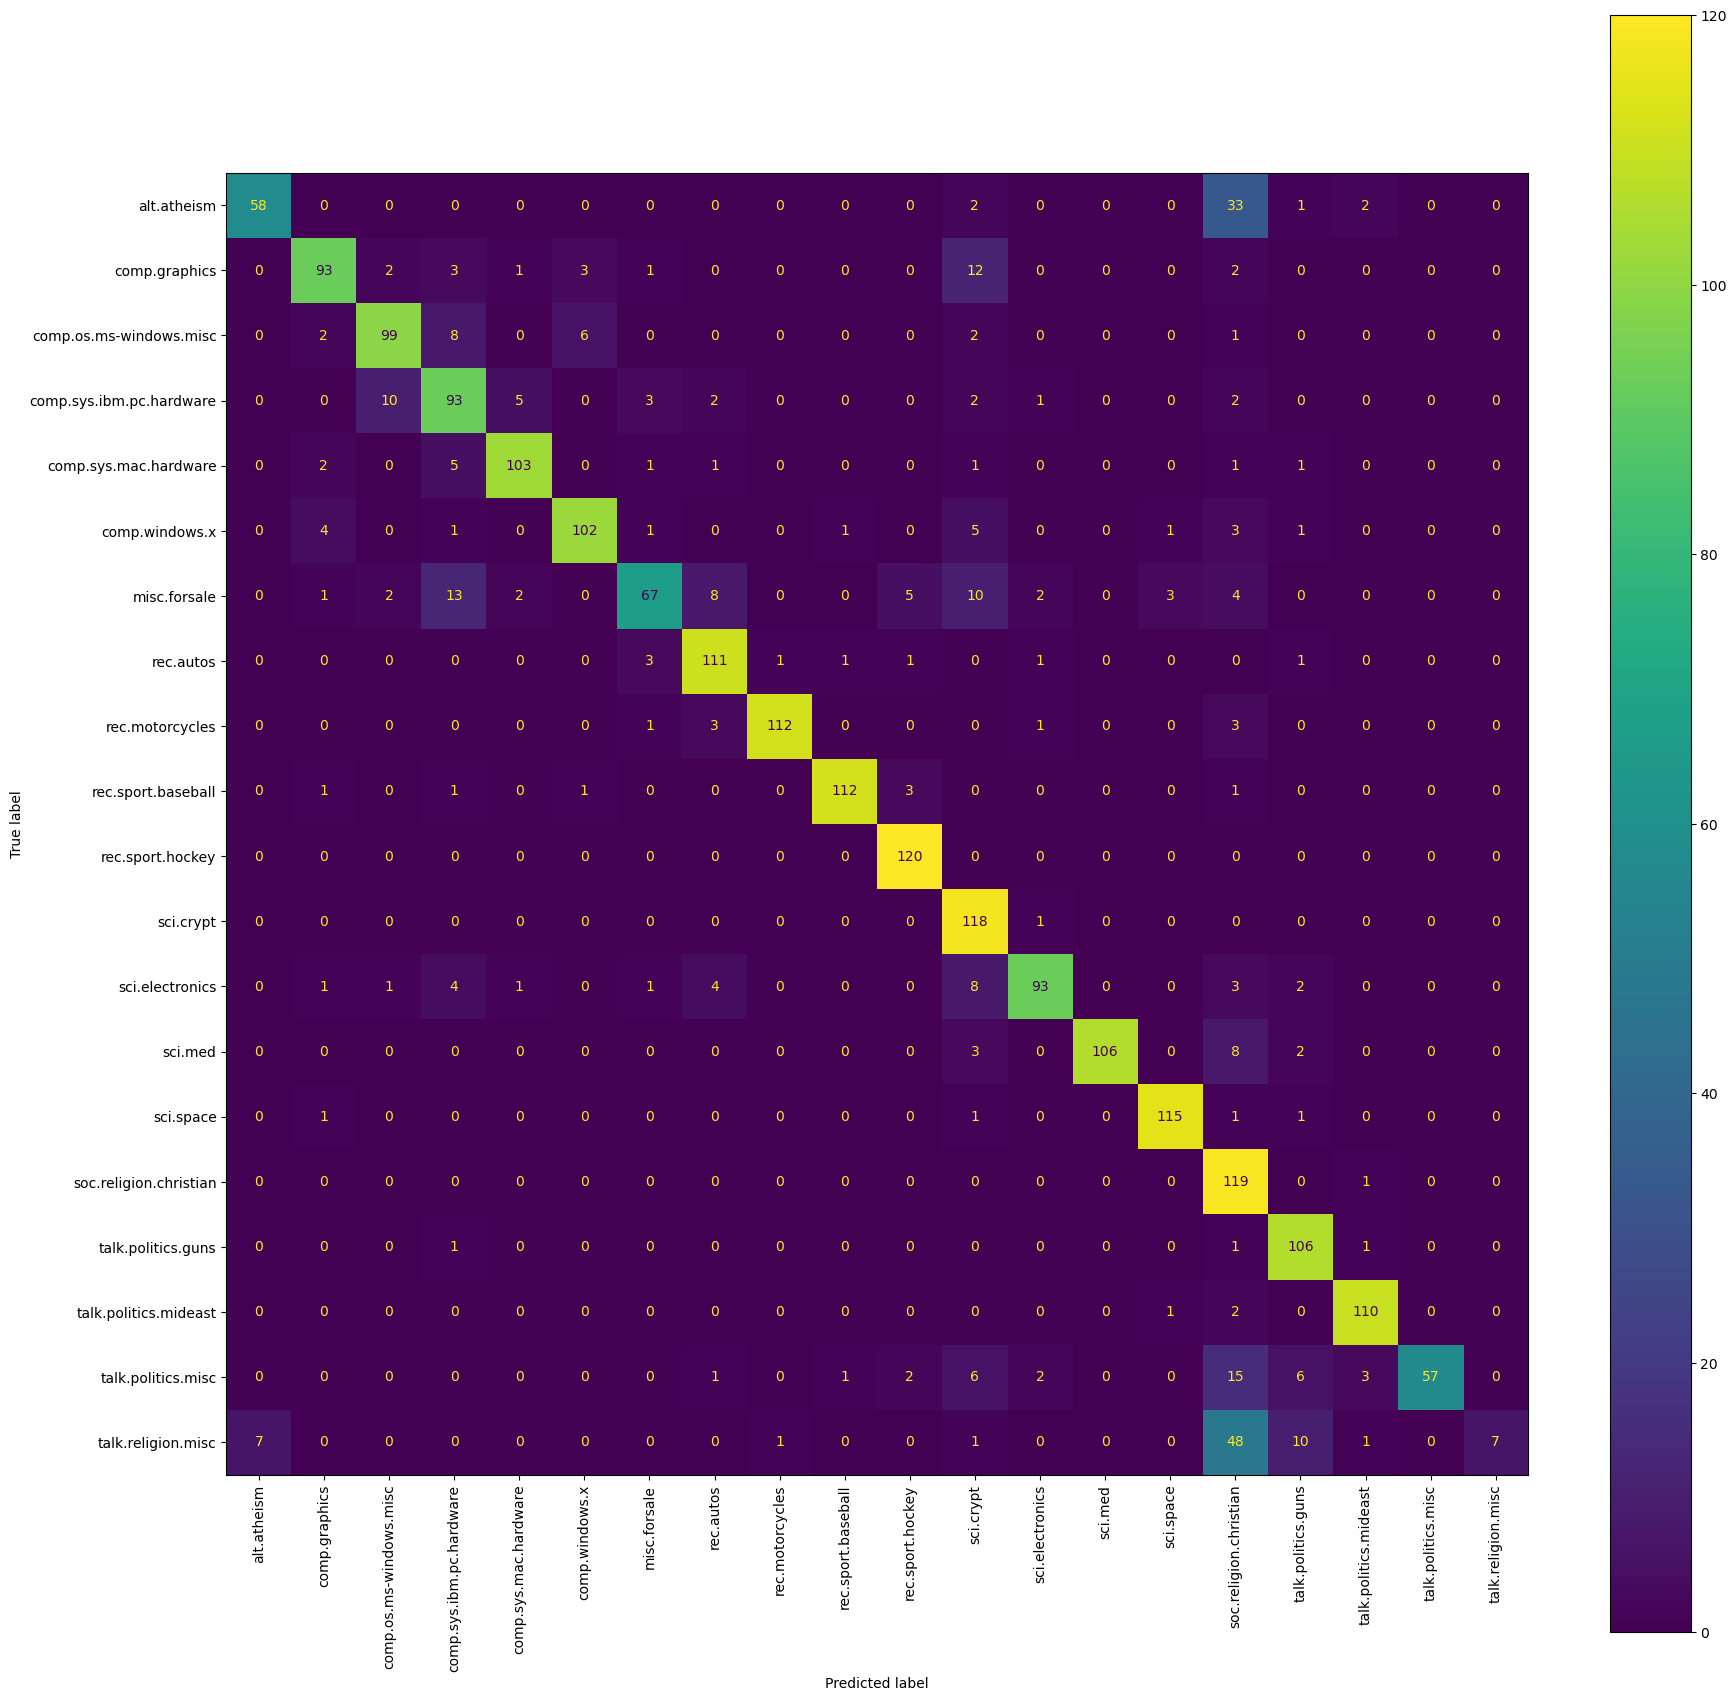

In [27]:
# 4. Using `classification_report` print the evaluation results for all the classes. 
fig, ax = plt.subplots(figsize=(21, 21))
disp = ConfusionMatrixDisplay.from_estimator(model_newsgroups, X_test, y_test, ax=ax);
plt.xticks(rotation=90);

# Manual predicition
Write a new sentence that you think will be classified as talk.politics.guns. 
1. Apply the text pipeline to your sentence
2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`
    * Note, the `transform` function accepts a list and not a individual string.
3. Use the model to predict your new `X`. 
4. Print the prediction

In [31]:
my_sentence = 'Guns in America need to be banned. This new policy should take effect in the near future'

# 1. Apply the text pipeline to your sentence
my_sentence = text_pipeline(my_sentence)
# Sanity check
print(my_sentence)

# 2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`\
new_text_vectorized = vectorizer.transform([my_sentence])
new_text_vectorized

# 3. Use the model to predict your new `X`. 
model_newsgroups.predict(new_text_vectorized)

# 4. Print the prediction
pp = model_newsgroups.predict_proba(new_text_vectorized)
# Print probabilities for that prediction
for class_name, percentage in zip(model_newsgroups.classes_, pp.round(3)[0]):
    print(class_name, percentage )

guns in america need to be banned this new policy should take effect in the near future
alt.atheism 0.028
comp.graphics 0.025
comp.os.ms-windows.misc 0.023
comp.sys.ibm.pc.hardware 0.026
comp.sys.mac.hardware 0.032
comp.windows.x 0.029
misc.forsale 0.019
rec.autos 0.049
rec.motorcycles 0.045
rec.sport.baseball 0.049
rec.sport.hockey 0.051
sci.crypt 0.081
sci.electronics 0.035
sci.med 0.066
sci.space 0.05
soc.religion.christian 0.059
talk.politics.guns 0.196
talk.politics.mideast 0.071
talk.politics.misc 0.047
talk.religion.misc 0.018


___
# PART 2: Twitter Data
This part of the exercise is un-guided on purpose.  

Using the `dem-vs-rep-tweets.csv` build a classifier to determine if a tweet was written by a democrat or republican. 

Can you get an f1-score higher than %82

In [32]:
# 1. Load the dem-vs-rep-tweets.csv data into a dataframe.
# 2. Print the shape
df_dem_vs_rep = pd.read_csv('data/dem-vs-rep-tweets.csv')
print(df_dem_vs_rep.shape)
df_dem_vs_rep.head()


(86460, 3)


,Party,Handle,Tweet
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P..."
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...


```
Columns:
Party -  Democratic or Republican 
Handle - the username that appears at the end of your unique Twitter URL.
Tweet - What they said
```

In [33]:
# 3. Inspect / remove nulls and duplicates
def inspect_dataframe(input_df):
   
    print('The Null Values:\n',input_df.isnull().sum())
    print('\n')
    print('The Duplicate Values:\n',input_df.duplicated().sum())
    print('\n')
    print('The Description:\n',input_df.describe())
    print('\n')
    print('Columns:')
    for col in input_df.columns:
        print(col)
    
    pass

inspect_dataframe(df_dem_vs_rep)


The Null Values:
 Party     0
Handle    0
Tweet     0
dtype: int64


The Duplicate Values:
 57


The Description:
              Party         Handle  \
count        86460          86460   
unique           2            433   
top     Republican  RepDarrenSoto   
freq         44392            200   

                                                    Tweet  
count                                               86460  
unique                                              84502  
top     RT @RepDanKildee: Four years later, Flint fami...  
freq                                                   31  


Columns:
Party
Handle
Tweet


```Doesn't drop duplicates so not sure why```

In [52]:
# Trying to drop duplicates
df_dem_vs_rep.drop_duplicates()
print(df_dem_vs_rep.duplicated().value_counts())
dup =  df_dem_vs_rep['Party'].duplicated().value_counts()
dup

False    86403
True        57
Name: count, dtype: int64


Party
True     86458
False        2
Name: count, dtype: int64

In [53]:
# Lowercase all words
def make_lower(a_string):
    return a_string.lower()

a_sentence = 'This was A SENTENCE with lower and UPPER CASE.'
make_lower(a_sentence)

'this was a sentence with lower and upper case.'

In [54]:
# Remove all punctuation
def remove_punctuation(a_string):    
    a_string = re.sub(r'[^\w\s]','',a_string)
    return a_string


a_sentence = 'This is a sentence! 50 With lots of punctuation??? & other #things.'
remove_punctuation(a_sentence)


'This is a sentence 50 With lots of punctuation  other things'

In [55]:
# Pipeline Function 
def text_pipeline(input_string):
    input_string = make_lower(input_string)
    input_string = remove_punctuation(input_string)
    return input_string

test_string = 'I played and started playing with players and we all love to play with plays'

text_pipeline(test_string)

'i played and started playing with players and we all love to play with plays'

In [58]:

df_dem_vs_rep['tweet_clean'] = df_dem_vs_rep['Tweet'].apply(text_pipeline)

print("ORIGINAL TEXT:\n", df_dem_vs_rep['Tweet'][0])
print('-'*999)
print("CLEANED TEXT:\n", df_dem_vs_rep['tweet_clean'][0])

ORIGINAL TEXT:
 Today, Senate Dems vote to #SaveTheInternet. Proud to support similar #NetNeutrality legislation here in the House… https://t.co/n3tggDLU1L
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Text Vectorization

In [59]:
# Define your `X` and `y` data. 

X = df_dem_vs_rep['tweet_clean']

y = df_dem_vs_rep['Party']

In [60]:
# Split our data into testing and training like always. 
X_train_party, X_test_party, y_train_party, y_test_party = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


# Save the raw text for later just incase
X_train_text_party = X_train_party
X_test_text_party = X_test_party

print(df_dem_vs_rep.shape, len(X_train_text_party))

(86460, 4) 69168


In [62]:
# Initialize our vectorizer
vectorizer = TfidfVectorizer()

# Fit your vectorizer using your X data, This makes your vocab matrix
vectorizer.fit(X_train_party)


TfidfVectorizer()

In [63]:
# This transforms your documents into vectors.
X_train_party = vectorizer.transform(X_train_party)
X_test_party = vectorizer.transform(X_test_party)

In [64]:
# Print the shape of your X.  How many features (aka columns) do you have?

print(X_train_party.shape, type(X_train_party))

(69168, 112381) <class 'scipy.sparse._csr.csr_matrix'>


# Build and Train Model

In [65]:
# Initialize an empty model. 
model_party = MultinomialNB()

In [66]:
# Fit our model with our training data.
model_party.fit(X_train_party, y_train_party)

MultinomialNB()

# Evaluate the model

In [67]:
# Make new predictions of our testing data. 
y_pred_party = model_party.predict(X_test_party)

In [68]:
# Print the accuracy of the model. 
accuracy_party =  model_party.score(X_test_party, y_test_party)

print("Model Accuracy: %f" % accuracy_party)

Model Accuracy: 0.802625


In [69]:
# Plot the confusion matrix of our predictions
# you can use Sklearns `ConfusionMatrixDisplay`
print(classification_report(y_test_party, y_pred_party, target_names=model_party.classes_))

              precision    recall  f1-score   support

    Democrat       0.83      0.75      0.79      8414
  Republican       0.78      0.85      0.82      8878

    accuracy                           0.80     17292
   macro avg       0.81      0.80      0.80     17292
weighted avg       0.80      0.80      0.80     17292



## f1 score of 82% Democrat
## f1 score of 79% Republican

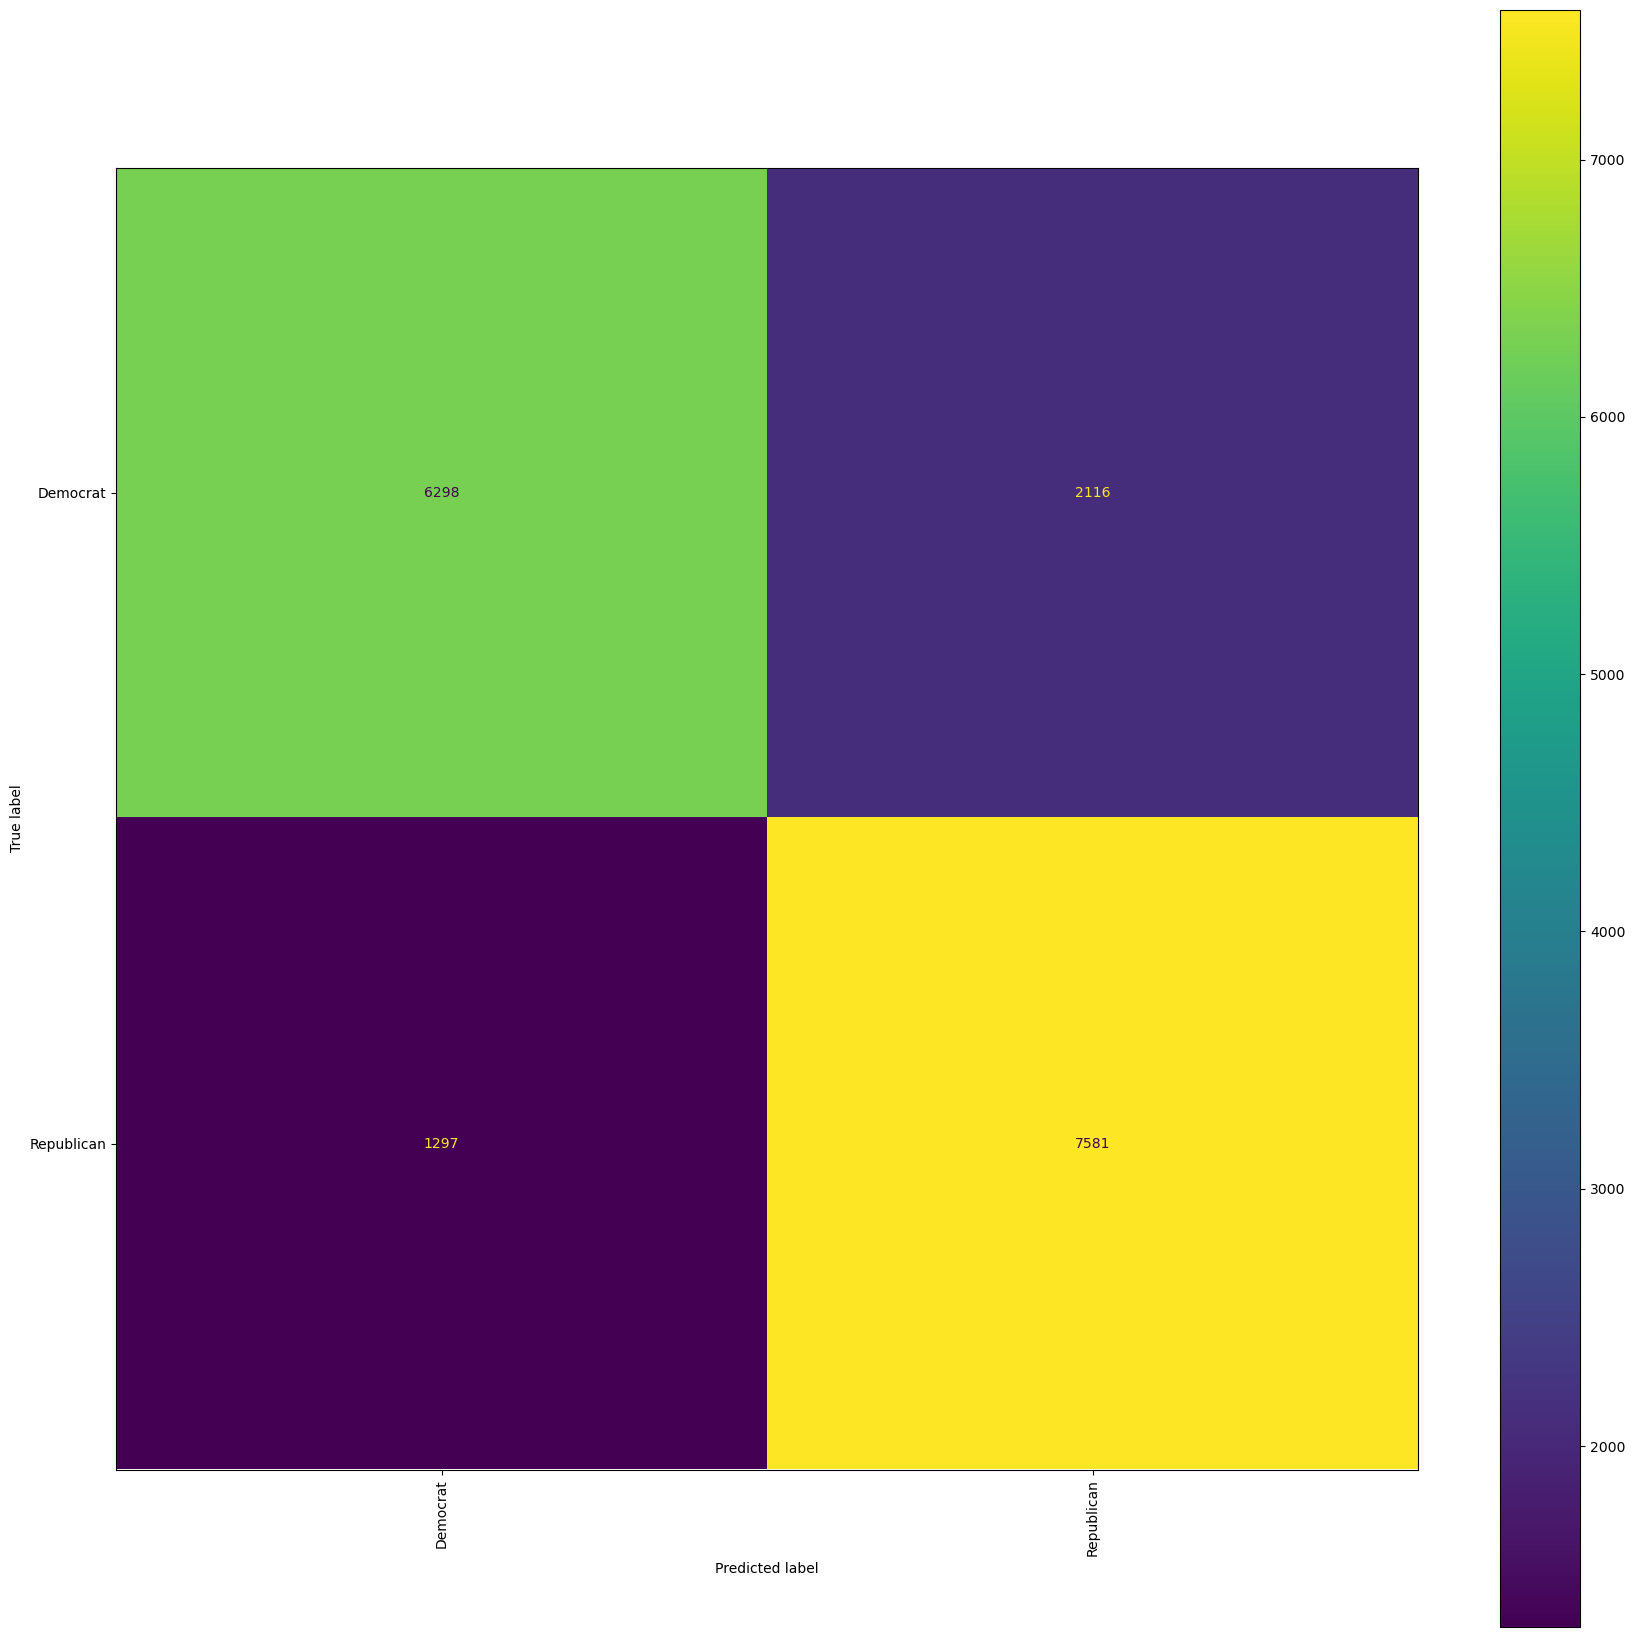

In [70]:
# Using `classification_report` print the evaluation results for all the classes. 
fig, ax = plt.subplots(figsize=(21, 21))
disp = ConfusionMatrixDisplay.from_estimator(model_party, X_test_party, y_test_party, ax=ax);
plt.xticks(rotation=90);

# Lets see if Random Forest can do better

In [71]:
rf_model_party = RandomForestClassifier(100)


# Fit our model with our training data.
rf_model_party.fit(X_train_party, y_train_party)


# Make new predictions of our testing data. 
y_pred_party = rf_model_party.predict(X_test_party)


# Make predicted probabilities of our testing data
y_pred_proba_party= rf_model_party.predict_proba(X_test_party)

# Evaluate our model
accuracy_party2 =  rf_model_party.score(X_test_party, y_test_party)

# Print our evaluation metrics
print("Model Accuracy: %f" % accuracy_party2)

print(classification_report(y_test_party, y_pred_party, target_names=rf_model_party.classes_))

Model Accuracy: 0.731147
              precision    recall  f1-score   support

    Democrat       0.76      0.65      0.70      8414
  Republican       0.71      0.81      0.76      8878

    accuracy                           0.73     17292
   macro avg       0.74      0.73      0.73     17292
weighted avg       0.74      0.73      0.73     17292



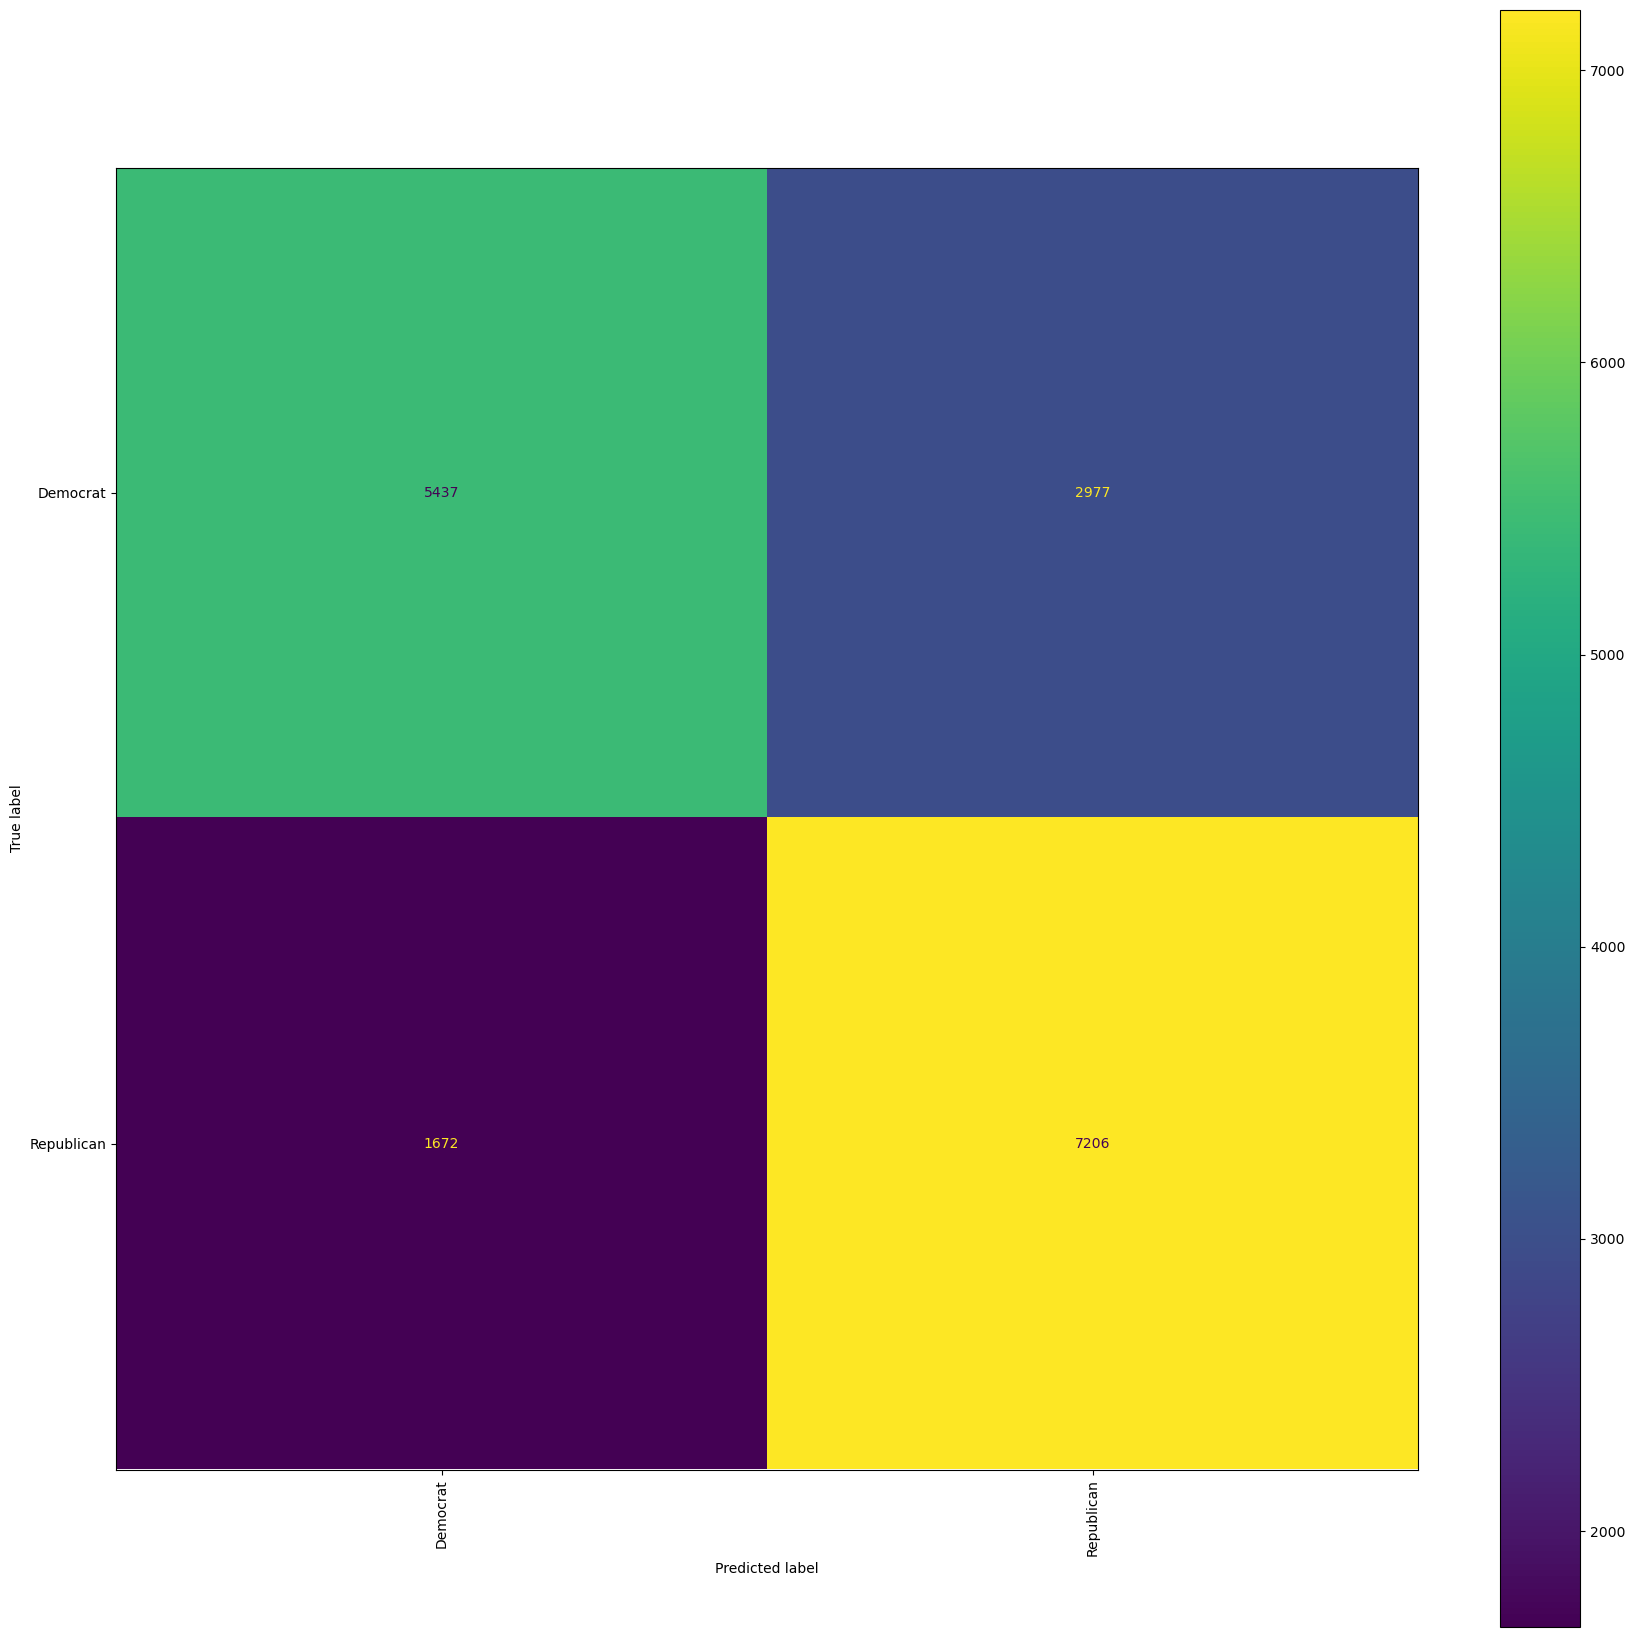

In [72]:
# Plot the confusion matrix of our results
fig, ax = plt.subplots(figsize=(21, 21))
disp = ConfusionMatrixDisplay.from_estimator(rf_model_party, X_test_party, y_test_party, ax=ax);
plt.xticks(rotation=90);

c:\ProgramData\anaconda3\envs\deeplearning\Lib\site-packages\sklearn\feature_extraction\text.py:1381: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


(69168, 235892)
model_party2 Accuracy: 0.686734
              precision    recall  f1-score   support

    Democrat       0.70      0.62      0.66      8414
  Republican       0.68      0.75      0.71      8878

    accuracy                           0.69     17292
   macro avg       0.69      0.69      0.68     17292
weighted avg       0.69      0.69      0.69     17292



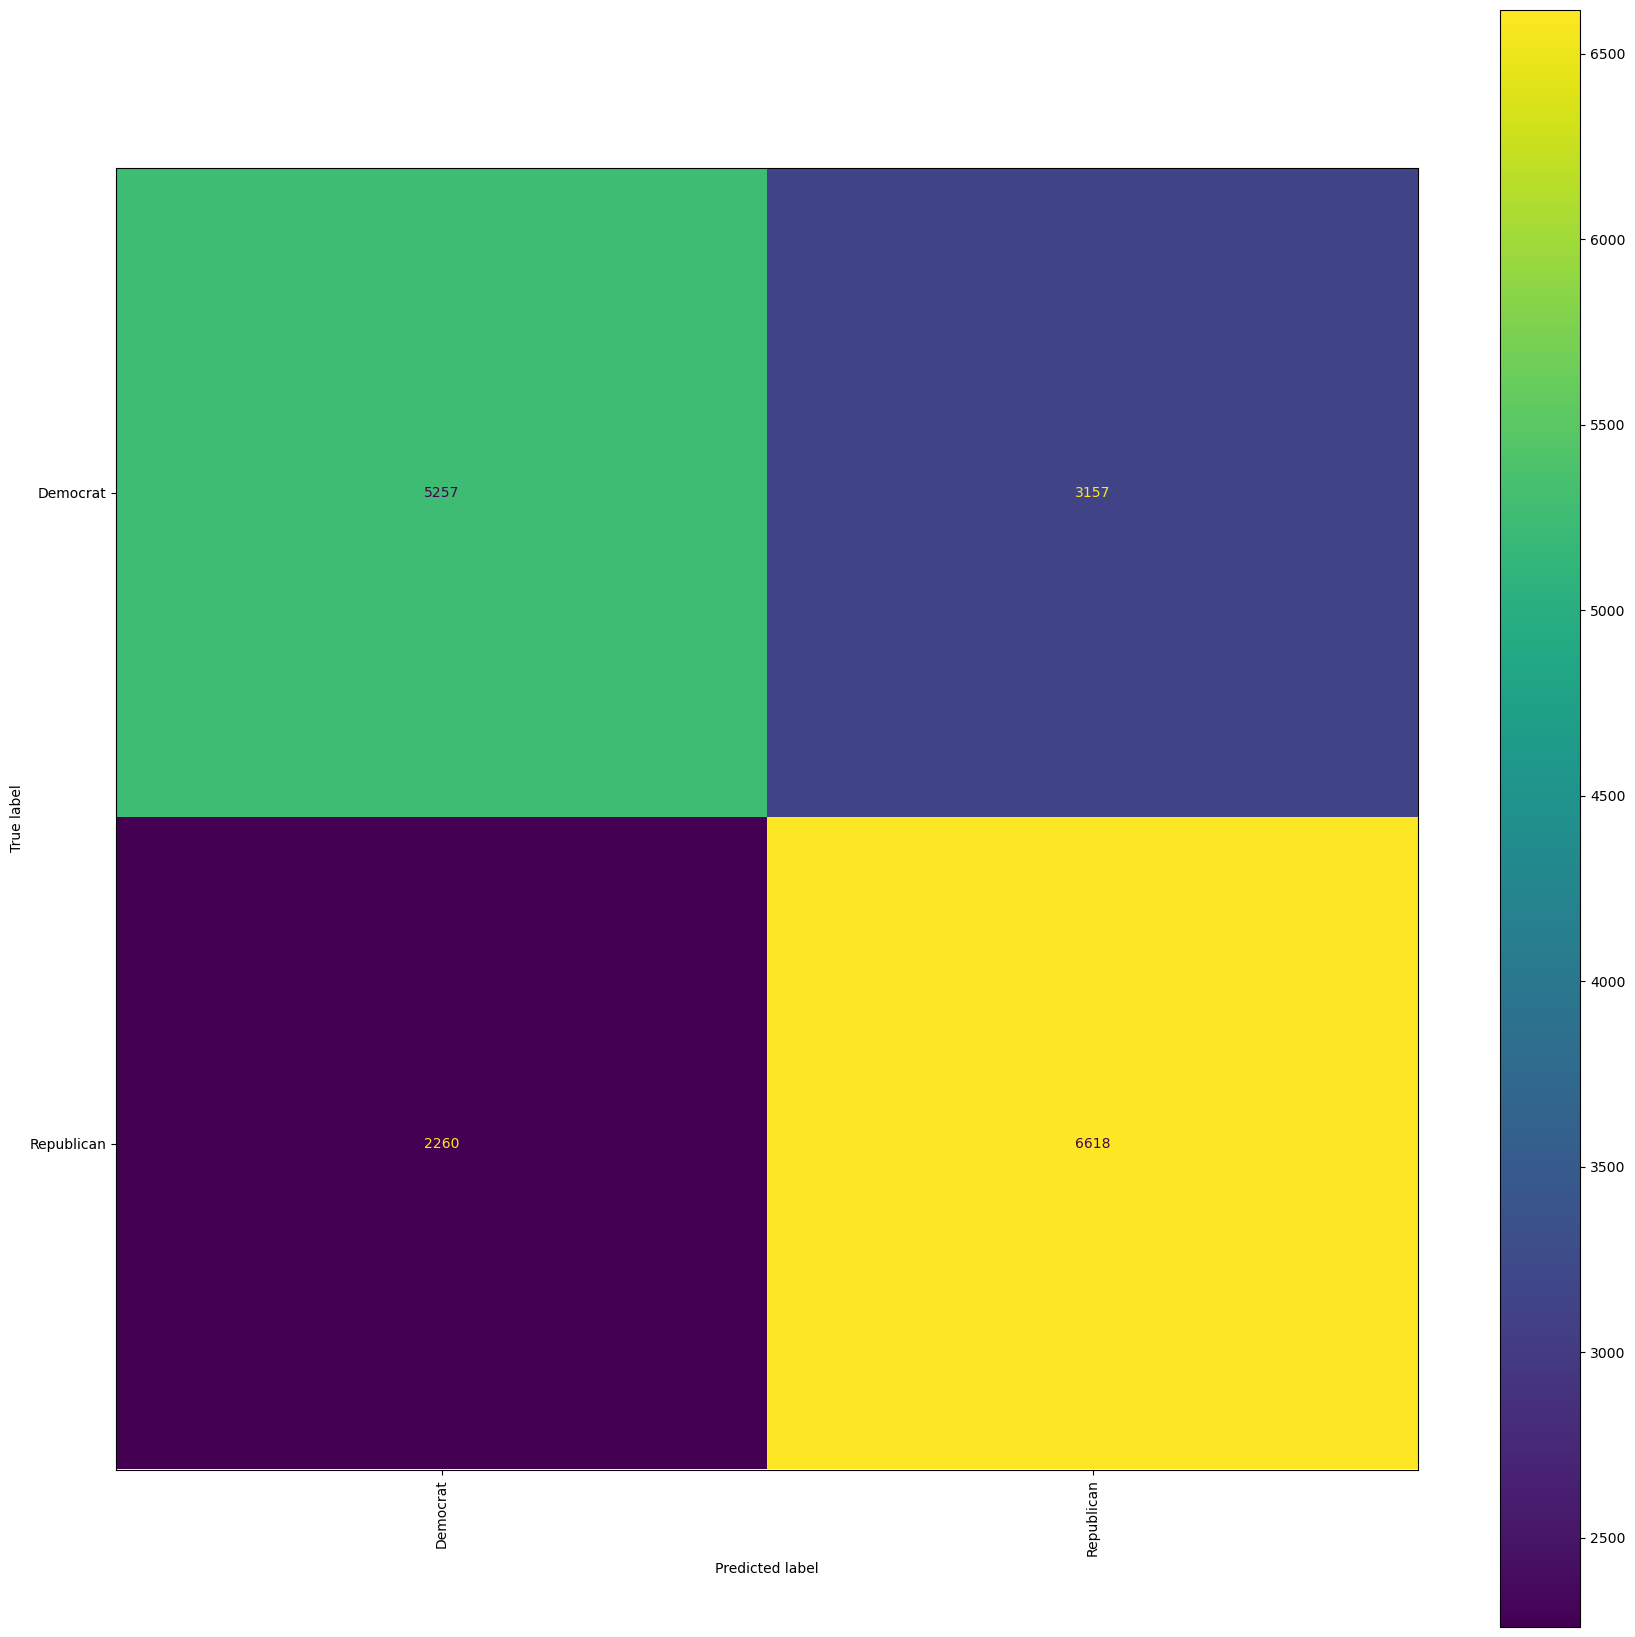

In [75]:
# Define our `X` and `y` data. 

X = df_dem_vs_rep['tweet_clean']

y = df_dem_vs_rep['Party']

# Split our data into testing and training like always. 
X_train_party2, X_test_party2, y_train_party2, y_test_party2 = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


# Save the raw text for later just incase
X_train_party2_text = X_train_party2
X_test_party2_text = X_test_party2


valid_english_vocab = set(nltk.corpus.words.words())


# Initialize our vectorizer
vectorizer_party2 = TfidfVectorizer(vocabulary=valid_english_vocab)

# This makes your vocab matrix
vectorizer_party2.fit(X_train_party2)

# This transforms your documents into vectors.
X_train_party2 = vectorizer_party2.transform(X_train_party2)
X_test_party2 = vectorizer_party2.transform(X_test_party2)

print(X_train_party2.shape)


# Initialize our model_party2.
model_party2 = MultinomialNB(alpha=.05)


# Fit our model with our training data.
model_party2.fit(X_train_party2, y_train_party2)


# Make new predictions of our testing data. 
y_pred_party2 = model_party2.predict(X_test_party2)


# Make predicted probabilites of our testing data
y_pred_proba_party2 = model_party2.predict_proba(X_test_party2)

# Evaluate our model_party2
accuracy_party3 =  model_party2.score(X_test_party2, y_test_party2)

# Print our evaluation metrics
print("model_party2 Accuracy: %f" % accuracy_party3)


from sklearn.metrics import classification_report

print(classification_report(y_test_party2, y_pred_party2, target_names=model_party2.classes_))

# Plot the confusion matrix of our results
fig, ax = plt.subplots(figsize=(21, 21))
disp = ConfusionMatrixDisplay.from_estimator(model_party2, X_test_party2, y_test_party2, ax=ax);
plt.xticks(rotation=90);



# Best model was model_party which was the first one

```Testing model_party```

In [77]:
my_sentence = "Every American deserves access to quality, affordable healthcare. Let's continue to fight for policies that ensure no one has to choose between their health and their wallet. #HealthcareForAll #Democrat"


# 1. Apply the text pipeline to your sentence
my_sentence = text_pipeline(my_sentence)
# Sanity check
print(my_sentence)

# 2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`\
new_text_vectorized = vectorizer.transform([my_sentence])
new_text_vectorized

# 3. Use the model to predict your new `X`. 
model_party.predict(new_text_vectorized)

# 4. Print the prediction
pp = model_party.predict_proba(new_text_vectorized)
# Print probabilities for that prediction
for class_name, percentage in zip(model_party.classes_, pp.round(3)[0]):
    print(class_name, percentage )

every american deserves access to quality affordable healthcare lets continue to fight for policies that ensure no one has to choose between their health and their wallet healthcareforall democrat
Democrat 0.744
Republican 0.256
